In [1]:
#@title Default title text
unseen_subj =  1619#@param {type:"integer"}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import json

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from datetime import datetime


!nvidia-smi

Mon Mar 15 14:58:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
project_dir="/content/drive/MyDrive/comp598-II/project"

src_dir=os.path.join(project_dir,"src")
datadir=os.path.join(project_dir,"data/")
npy_dir=os.path.join(project_dir,"data/npy")
result_dir=os.path.join(project_dir,"notebooks/DANN-WISDM/experiments")

import sys
sys.path.append(src_dir)

import dann_v1 as dann

In [4]:
seen_subj = list(range(1600,1605))

In [5]:
save_dir=str(seen_subj[0])+"-"
for s in seen_subj[1:]:
  save_dir+=(str(s)[2:]+"-")

save_dir+=("to-{}".format(unseen_subj))
save_dir=os.path.join(result_dir,save_dir)

try:  
    os.mkdir(save_dir)  
except OSError as error:  
    print(error) 

In [6]:
summary={}

alpha=0.75
batchsize=32
EPOCHS=90
indomain_epoch=20
cv=5

clf_lr= 1e-4
disc_lr=1e-4
ext_lr= 1e-4

act_subset=['Walking',
            'Clapping',
            'Drinking from Cup',
            'Jogging',
            'Brushing Teeth',
            'Typing',
            'Writing',
            'Stairs']

seen_device, unseen_device = "watch", "watch"
seen_sensor, unseen_sensor = "accel", "accel"


with open(os.path.join(datadir,"act_to_int.json"),"r") as jpath:
  act_int_lookup=json.load(jpath)

int_act_lookup={act_int_lookup[key]:key for key in act_int_lookup}

(seen_x,seen_y),(unseen_x,unseen_y),num_class, remapping_dict = dann.load_subjects(npy_dir,
                                                                   seen_subj,
                                                                   seen_device,
                                                                   seen_sensor,
                                                                   unseen_subj,
                                                                   unseen_device,
                                                                   unseen_sensor,
                                                                   act_int_lookup,
                                                                   act_subset)

remapped_int_act_lookup={remapping_dict[key]:int_act_lookup[int(remapping_dict[key])] for key in remapping_dict}
print(remapped_int_act_lookup)

print(seen_x.shape,seen_y.shape)
print(unseen_x.shape,unseen_y.shape)

{0: 'Walking', 1: 'Jogging', 2: 'Stairs', 3: 'Sitting', 4: 'Standing', 5: 'Typing', 6: 'Brushing Teeth', 7: 'Eating Soup'}
(2840, 100, 3) (2840,)
(568, 100, 3) (568,)


In [7]:
summary['alpha']=alpha
summary['batchsize']=batchsize
summary['crossdomain epoch']=EPOCHS
summary['indomain epoch']=indomain_epoch

summary['clf lr']=clf_lr
summary['disc lr']=disc_lr
summary['ext lr']=ext_lr
summary['act']=remapped_int_act_lookup

summary['source subj']=seen_subj
summary['source device']=seen_device
summary['source sensor']=seen_sensor
summary['source data shape']=seen_x.shape
summary['source class dist']=dann.label_breakdown(seen_y)

summary['target subj']=unseen_subj
summary['target device']=unseen_device
summary['target sensor']=unseen_sensor
summary['target data shape']=unseen_x.shape
summary['target class dist']=dann.label_breakdown(unseen_y)

In [8]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain epoch': 90,
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain epoch': 20,
 'source class dist': {0: 355,
  1: 355,
  2: 355,
  3: 355,
  4: 355,
  5: 355,
  6: 355,
  7: 355},
 'source data shape': (2840, 100, 3),
 'source device': 'watch',
 'source sensor': 'accel',
 'source subj': [1600, 1601, 1602, 1603, 1604],
 'target class dist': {0: 71, 1: 71, 2: 71, 3: 71, 4: 71, 5: 71, 6: 71, 7: 71},
 'target data shape': (568, 100, 3),
 'target device': 'watch',
 'target sensor': 'accel',
 'target subj': 1619}

epoch 1/90
18/18 [==============================] - 36s 108ms/batch - classifier acc: 0.4441 - classifier loss: 1.4244 - domain acc: 0.5267 - domain_loss: 0.5245
epoch 2/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.6562 - classifier loss: 0.8439 - domain acc: 0.5457 - domain_loss: 0.5526
epoch 3/90
18/18 [==============================] - 1s 72ms/batch - classifier acc: 0.7007 - classifier loss: 0.7107 - domain acc: 0.5538 - domain_loss: 0.5336
epoch 4/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.7220 - classifier loss: 0.6460 - domain acc: 0.5511 - domain_loss: 0.5462
epoch 5/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.7648 - classifier loss: 0.5331 - domain acc: 0.5681 - domain_loss: 0.5320
epoch 6/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.7895 - classifier loss: 0.4590 - domain acc: 0.5505 - domain_loss: 0.5222
epoch 7/90
18/18 [====================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 1/5 ==========================
0.9894366197183099
0.7975352112676056
0.5715962441314554
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1619/crossdomain-1_5.jpg
epoch 1/90
18/18 [==============================] - 2s 78ms/batch - classifier acc: 0.4079 - classifier loss: 1.4841 - domain acc: 0.5331 - domain_loss: 0.5501
epoch 2/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.5987 - classifier loss: 1.0008 - domain acc: 0.5149 - domain_loss: 0.6453
epoch 3/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6809 - classifier loss: 0.6888 - domain acc: 0.5425 - domain_loss: 0.5814
epoch 4/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.7484 - classifier loss: 0.5740 - domain acc: 0.5527 - domain_loss: 0.5513
epoch 5/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.7319 - classifier loss: 0.5638 - d

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 2/5 ==========================
0.8616197183098592
0.6830985915492958
0.5919405320813772
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1619/crossdomain-2_5.jpg
epoch 1/90
18/18 [==============================] - 2s 79ms/batch - classifier acc: 0.4868 - classifier loss: 1.3544 - domain acc: 0.4968 - domain_loss: 0.5974
epoch 2/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6513 - classifier loss: 0.8114 - domain acc: 0.5056 - domain_loss: 0.6727
epoch 3/90
18/18 [==============================] - 1s 76ms/batch - classifier acc: 0.6694 - classifier loss: 0.7917 - domain acc: 0.4969 - domain_loss: 0.7259
epoch 4/90
18/18 [==============================] - 1s 76ms/batch - classifier acc: 0.6941 - classifier loss: 0.6955 - domain acc: 0.5352 - domain_loss: 0.5662
epoch 5/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.7155 - classifier loss: 0.5682 - d

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 3/5 ==========================
0.9975352112676056
0.9278169014084507
0.5044992175273866
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1619/crossdomain-3_5.jpg
epoch 1/90
18/18 [==============================] - 2s 79ms/batch - classifier acc: 0.4293 - classifier loss: 1.4596 - domain acc: 0.4880 - domain_loss: 0.5659
epoch 2/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6168 - classifier loss: 0.9243 - domain acc: 0.5397 - domain_loss: 0.5505
epoch 3/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6974 - classifier loss: 0.6673 - domain acc: 0.5385 - domain_loss: 0.5762
epoch 4/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.7023 - classifier loss: 0.6547 - domain acc: 0.5448 - domain_loss: 0.5487
epoch 5/90
18/18 [==============================] - 1s 76ms/batch - classifier acc: 0.7352 - classifier loss: 0.5405 - d

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 4/5 ==========================
0.9996478873239436
0.9190140845070423
0.6032863849765259
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1619/crossdomain-4_5.jpg
epoch 1/90
18/18 [==============================] - 2s 78ms/batch - classifier acc: 0.4030 - classifier loss: 1.4229 - domain acc: 0.5204 - domain_loss: 0.5531
epoch 2/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6447 - classifier loss: 0.8309 - domain acc: 0.5388 - domain_loss: 0.5950
epoch 3/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6809 - classifier loss: 0.7277 - domain acc: 0.5113 - domain_loss: 0.6201
epoch 4/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6875 - classifier loss: 0.6964 - domain acc: 0.5251 - domain_loss: 0.5789
epoch 5/90
18/18 [==============================] - 1s 76ms/batch - classifier acc: 0.7697 - classifier loss: 0.5726 - d

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 5/5 ==========================
0.9834507042253521
0.7852112676056338
0.59839593114241
/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1619/crossdomain-5_5.jpg


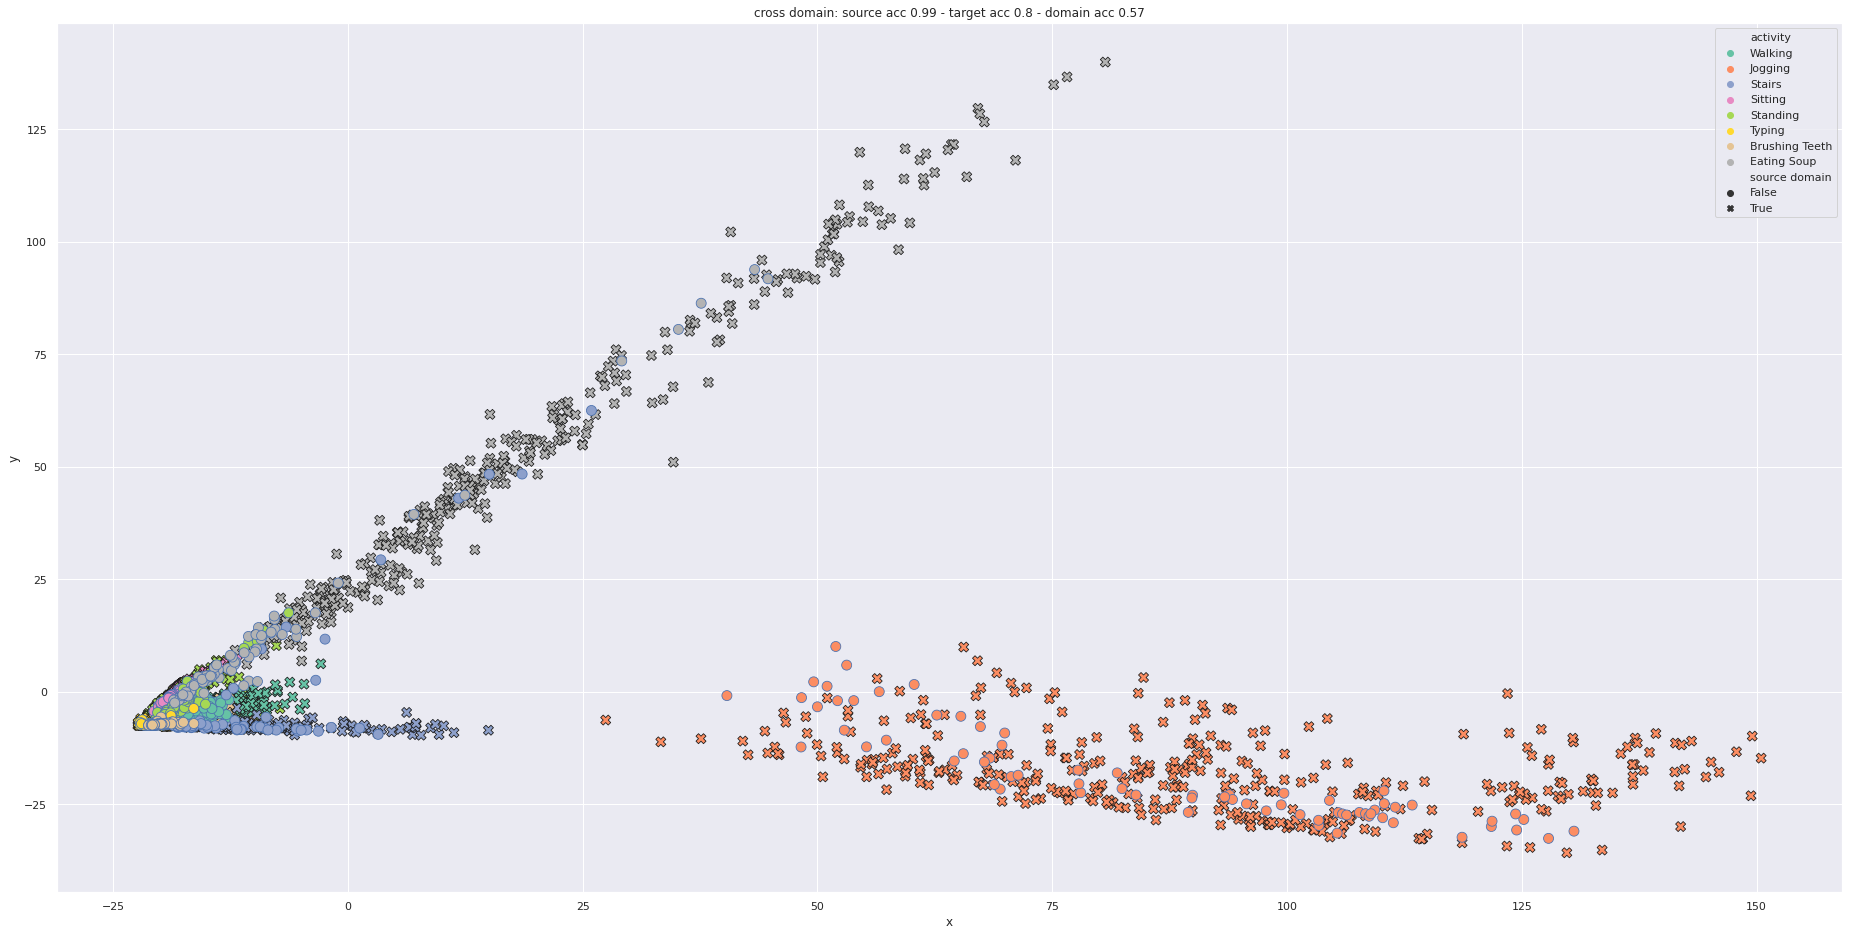

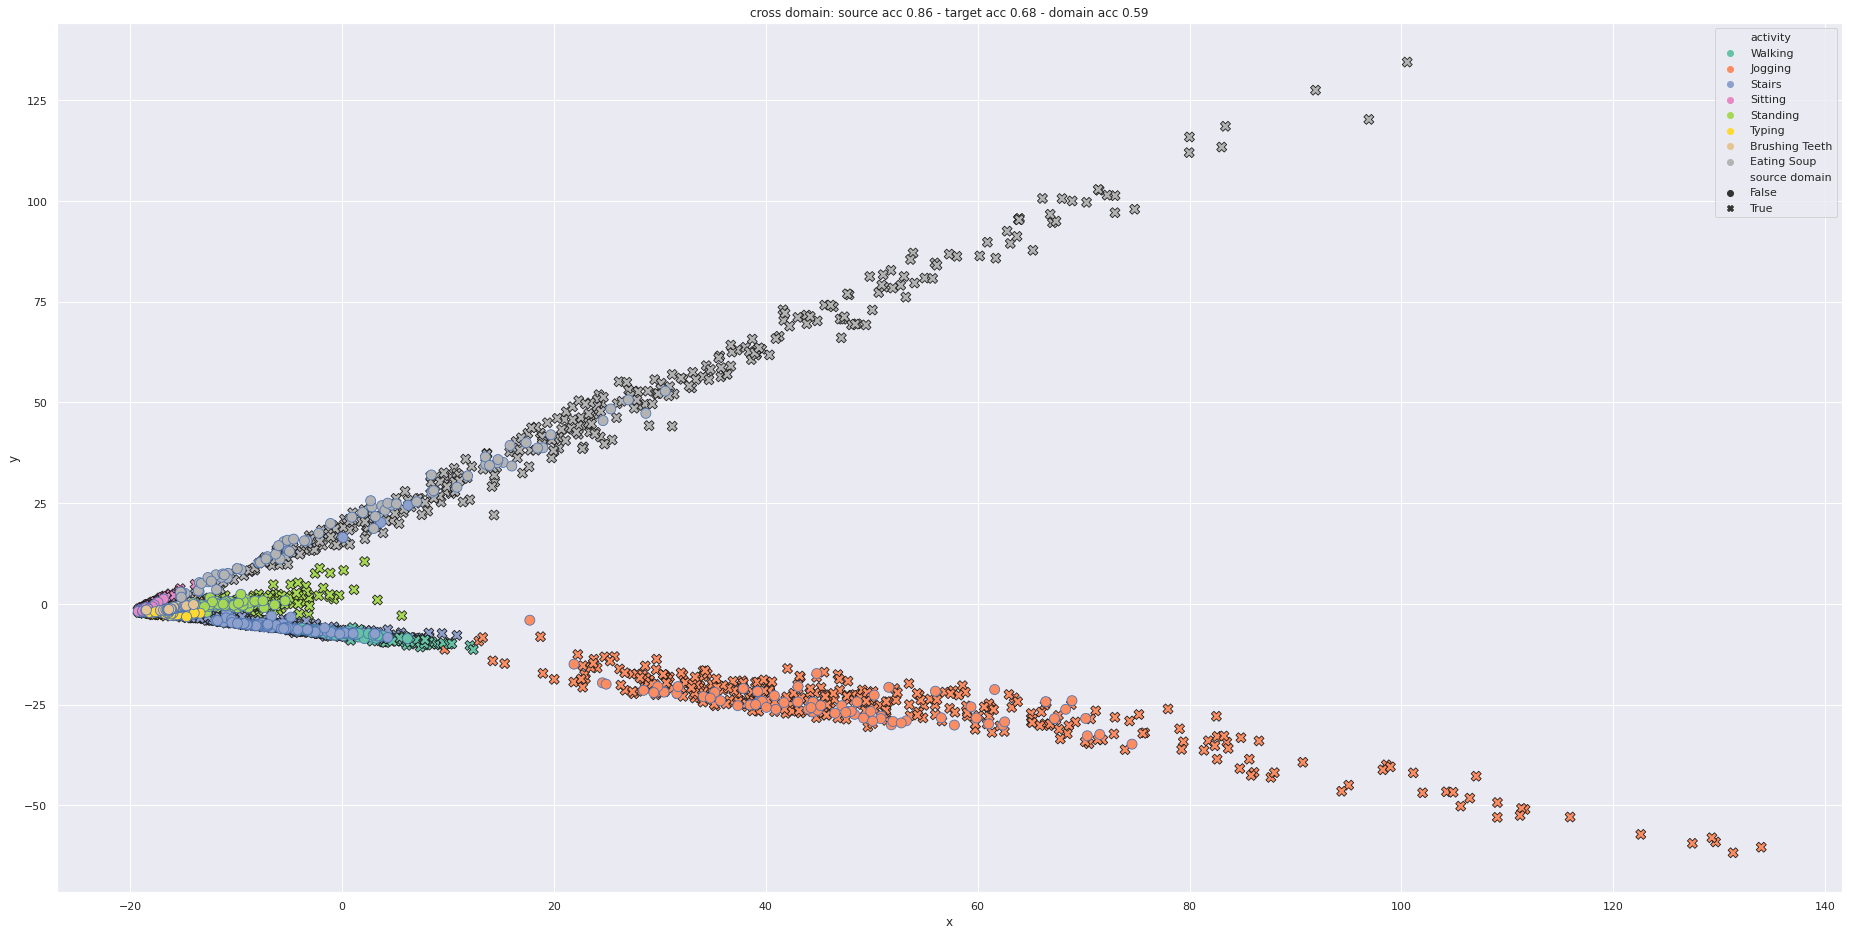

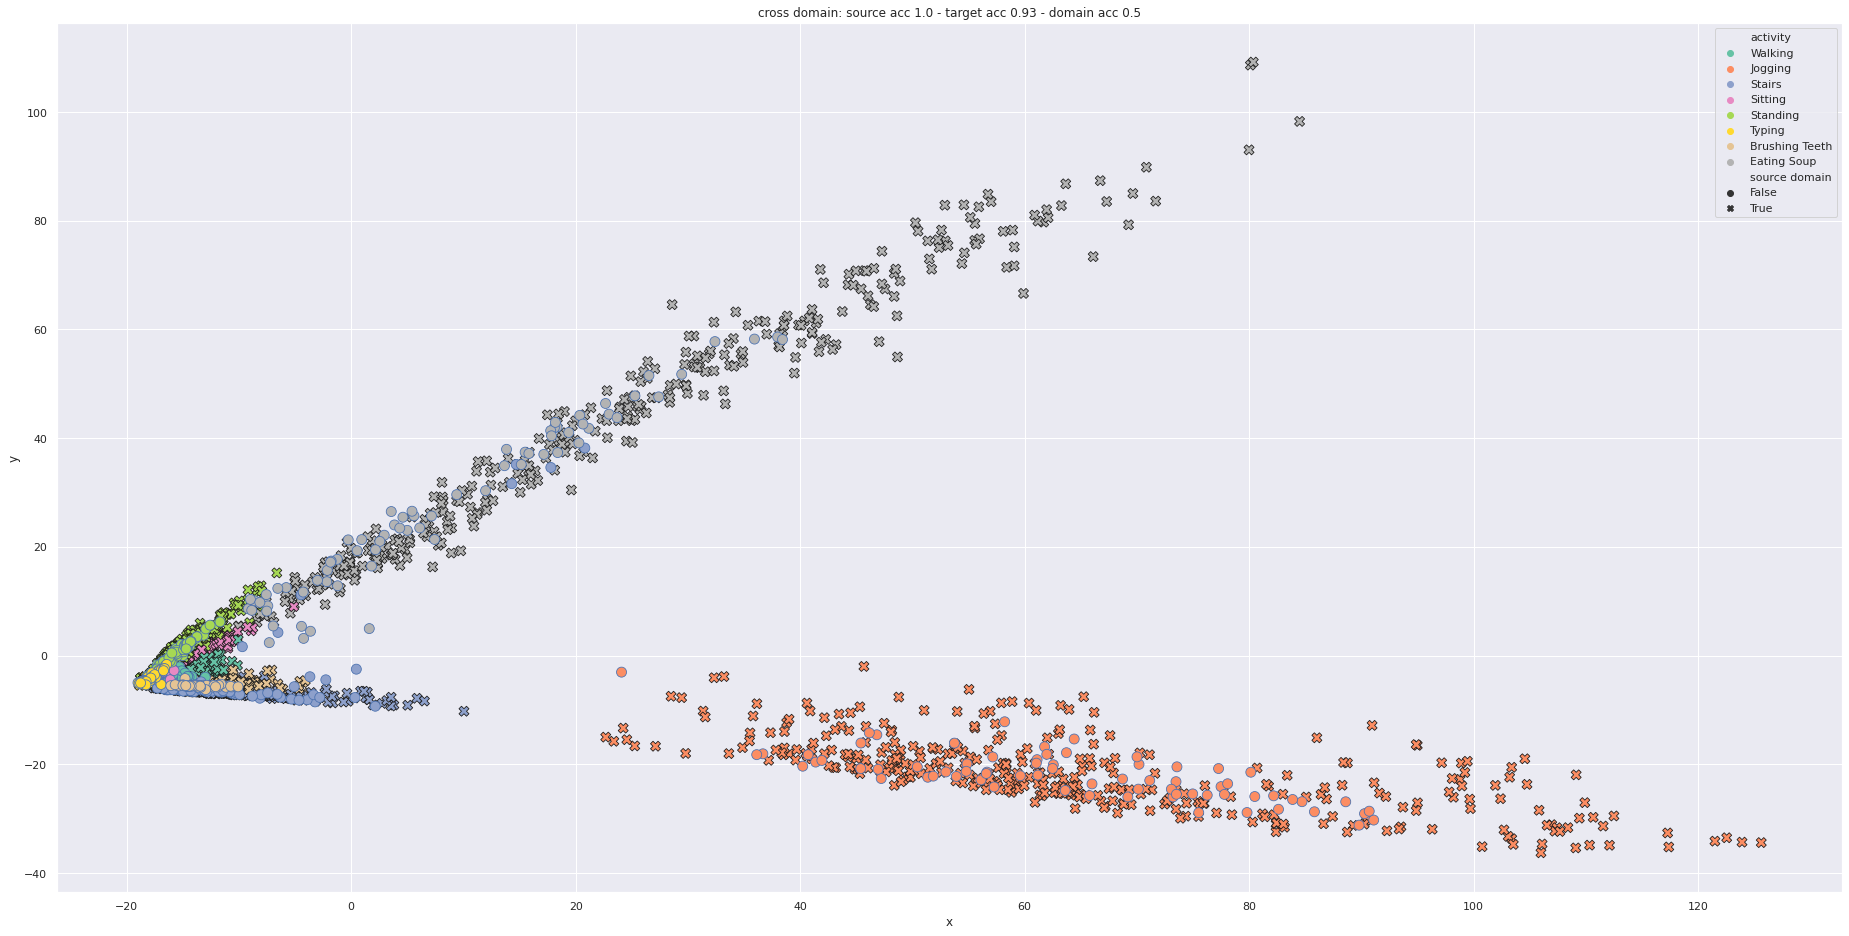

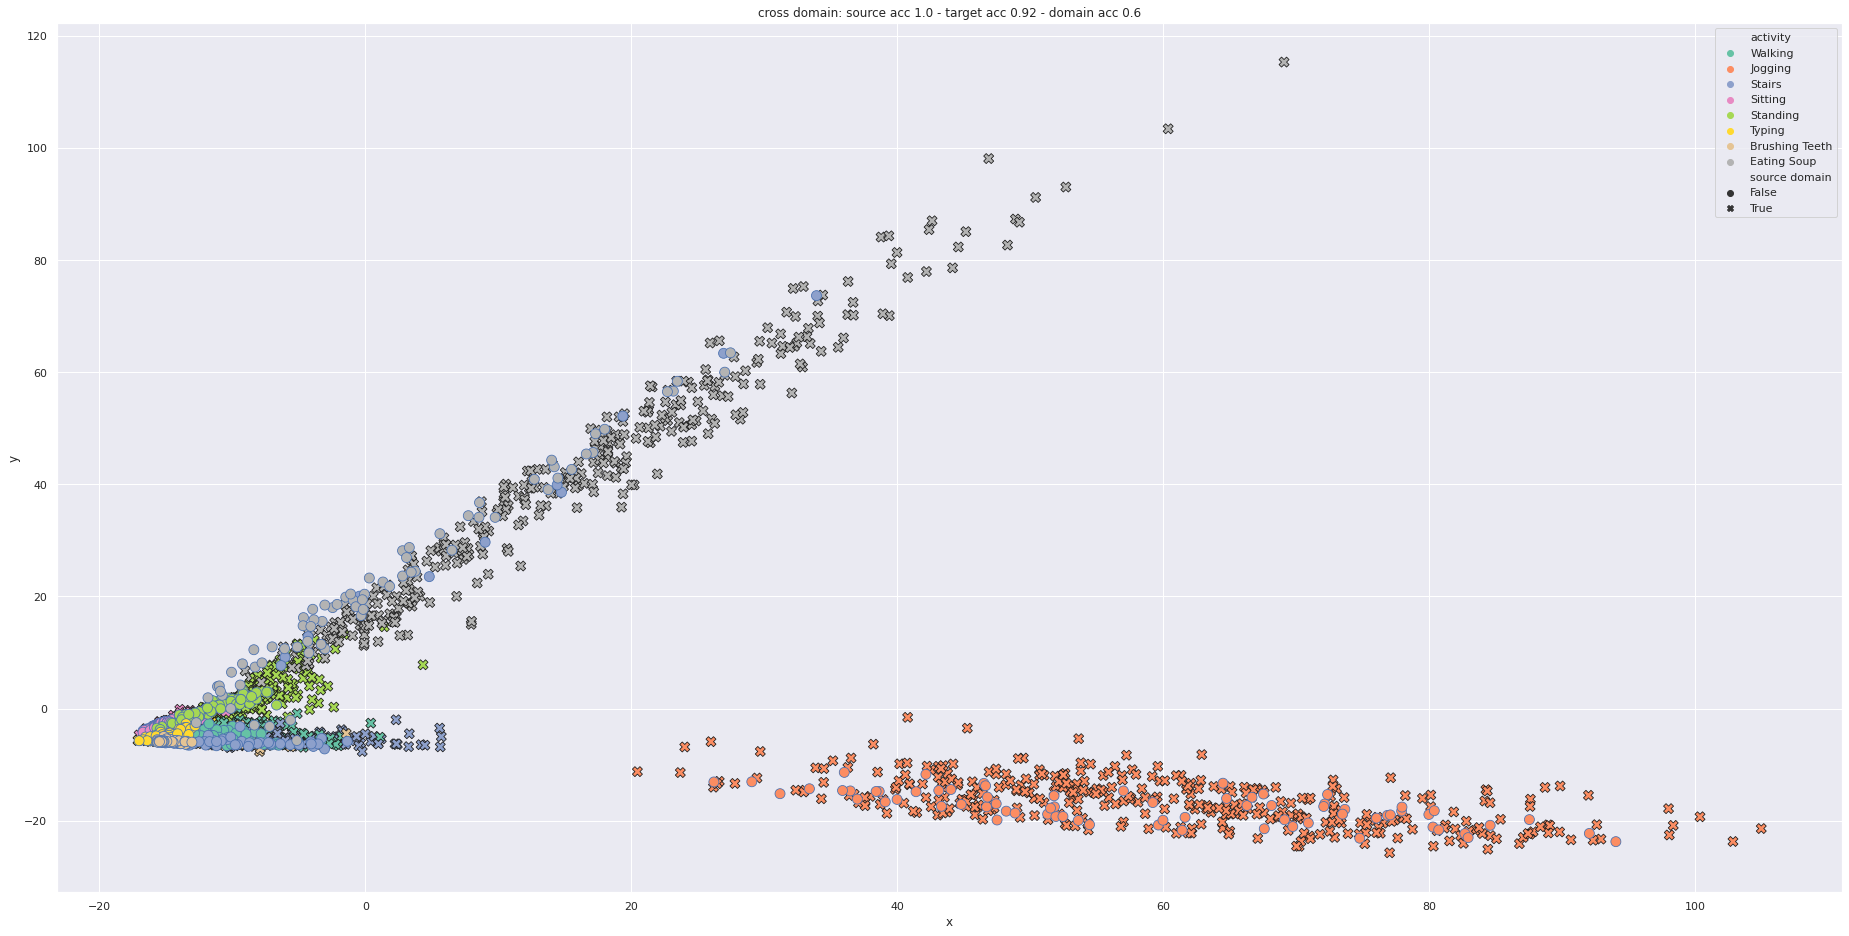

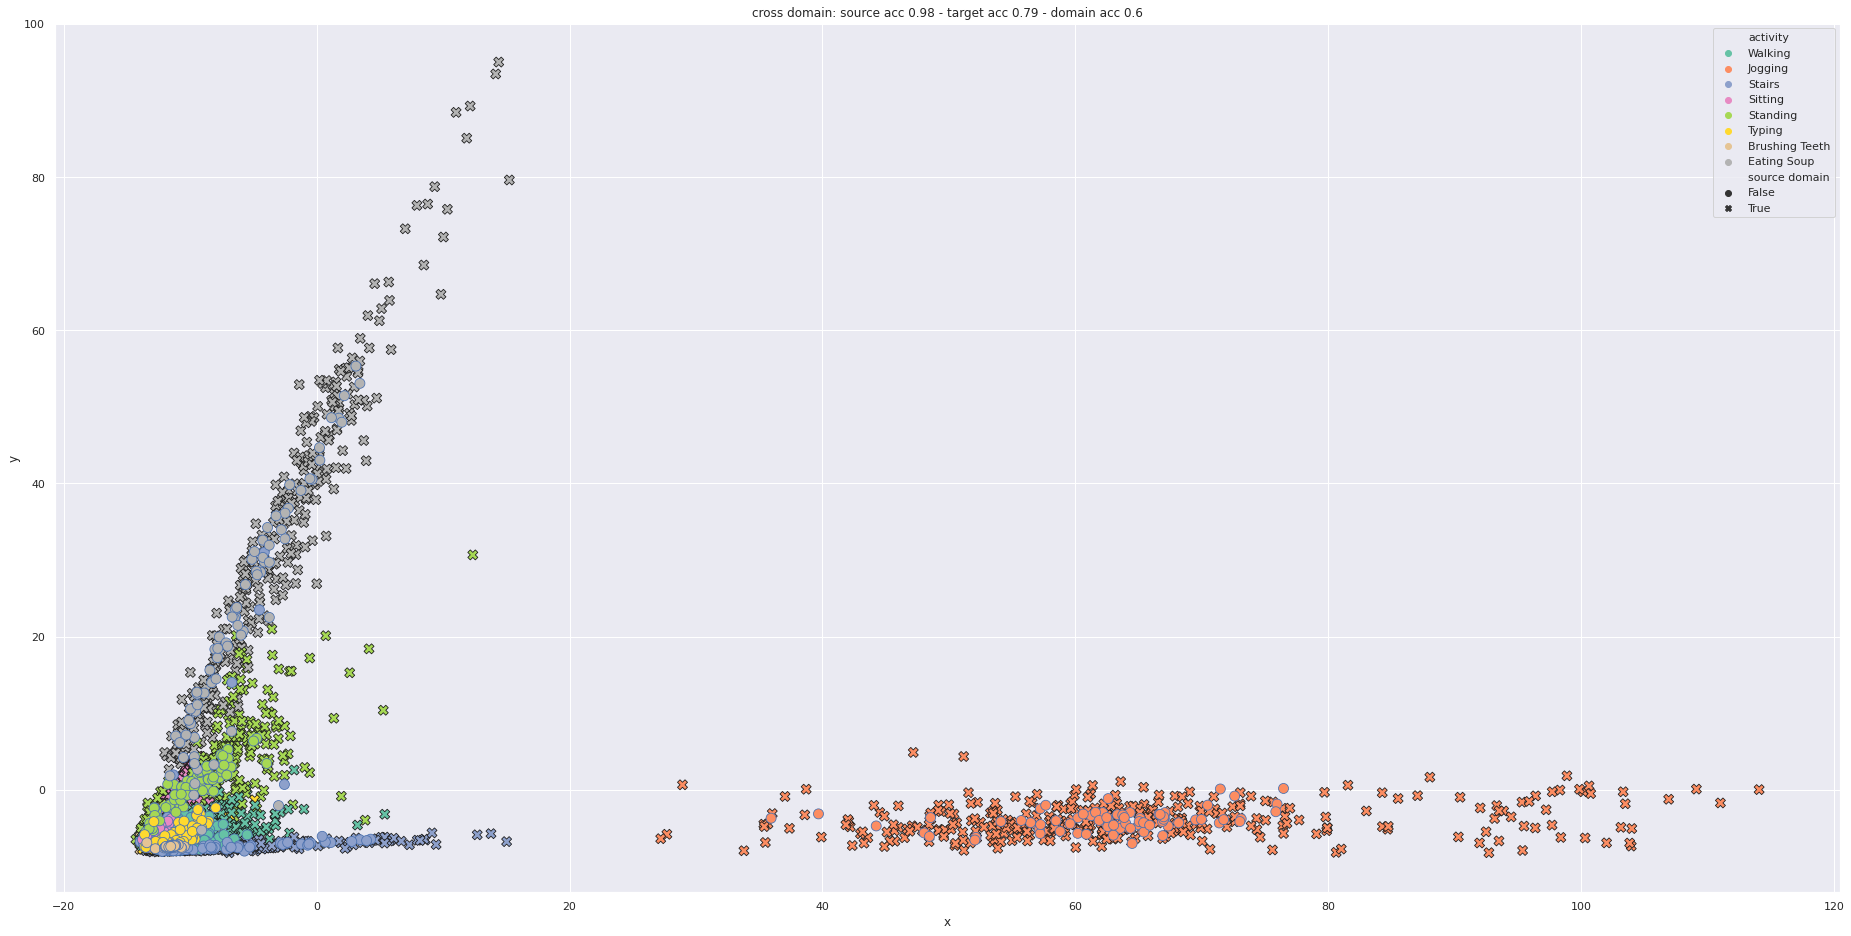

In [9]:
crossdomain_source_acc=[]
crossdomain_target_acc=[]

domain_label_acc=[]

for c in range(cv):
  tf.keras.backend.clear_session()
  crossdomain_model=dann.DANN(alpha=alpha,
                              epochs=EPOCHS,
                              batchsize=batchsize,
                              classifier_lr=clf_lr,
                              extractor_lr=ext_lr,
                              discriminator_lr=disc_lr)

  submodels=dann.submodel_config_march_15(num_class)
  crossdomain_model.set_submodels(submodels)

  crossdomain_model.cross_domain_train(seen_x,seen_y,unseen_x)

  source_acc=crossdomain_model.evaluate_classifier_acc(seen_x,seen_y)
  target_acc=crossdomain_model.evaluate_classifier_acc(unseen_x,unseen_y)
  domain_acc=crossdomain_model.evaluate_domain_acc(seen_x,unseen_x)

  print("============================ cv {}/{} ==========================".format(c+1,cv))
  print(source_acc)
  print(target_acc)
  print(domain_acc)
  print("==============================================================")

  crossdomain_source_acc.append(source_acc)
  crossdomain_target_acc.append(target_acc)
  domain_label_acc.append(domain_acc)

  dann.plot_pca_distributions(crossdomain_model.extractor,seen_x,seen_y,unseen_x,unseen_y,remapped_int_act_lookup)
  plt.title("cross domain: source acc {} - target acc {} - domain acc {}".format(np.round(source_acc,2),np.round(target_acc,2),np.round(domain_acc,2)))
  plt.legend(loc='upper right')

  plotname="crossdomain-{}_{}.jpg".format(c+1,cv)
  plotname=os.path.join(save_dir,plotname)

  plt.savefig(plotname,dpi=150,bbox_inches='tight')
  print(plotname)

summary['crossdomain source acc']=crossdomain_source_acc
summary['crossdomain target acc']=crossdomain_target_acc
summary['crossdomain domain acc']=domain_label_acc

In [10]:
print("source domain acc: ",crossdomain_source_acc)
print("avg: ",np.mean(crossdomain_source_acc))
print()
print("target domain acc: ",crossdomain_target_acc)
print("avg: ",np.mean(crossdomain_target_acc))

source domain acc:  [0.9894366197183099, 0.8616197183098592, 0.9975352112676056, 0.9996478873239436, 0.9834507042253521]
avg:  0.9663380281690139

target domain acc:  [0.7975352112676056, 0.6830985915492958, 0.9278169014084507, 0.9190140845070423, 0.7852112676056338]
avg:  0.8225352112676056


In [11]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain domain acc': [0.5715962441314554,
  0.5919405320813772,
  0.5044992175273866,
  0.6032863849765259,
  0.59839593114241],
 'crossdomain epoch': 90,
 'crossdomain source acc': [0.9894366197183099,
  0.8616197183098592,
  0.9975352112676056,
  0.9996478873239436,
  0.9834507042253521],
 'crossdomain target acc': [0.7975352112676056,
  0.6830985915492958,
  0.9278169014084507,
  0.9190140845070423,
  0.7852112676056338],
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain epoch': 20,
 'source class dist': {0: 355,
  1: 355,
  2: 355,
  3: 355,
  4: 355,
  5: 355,
  6: 355,
  7: 355},
 'source data shape': (2840, 100, 3),
 'source device': 'watch',
 'source sensor': 'accel',
 'source subj': [1600, 1601, 1602, 1603, 1604],
 'target class dist': {0: 71, 1: 71, 2: 71, 3: 71, 4: 71, 5: 7

Epoch 1/20
 1/89 [..............................] - ETA: 10s - loss: 2.0872 - acc: 0.0938

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


89/89 [==============================] - 2s 27ms/step - loss: 1.1042 - acc: 0.5508
Epoch 2/20
89/89 [==============================] - 2s 23ms/step - loss: 0.4053 - acc: 0.8245
Epoch 3/20
89/89 [==============================] - 2s 23ms/step - loss: 0.3470 - acc: 0.8456
Epoch 4/20
89/89 [==============================] - 2s 23ms/step - loss: 0.2060 - acc: 0.9166
Epoch 5/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1563 - acc: 0.9341
Epoch 6/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1211 - acc: 0.9555
Epoch 7/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0872 - acc: 0.9680
Epoch 8/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0482 - acc: 0.9825
Epoch 9/20
89/89 [==============================] - 2s 24ms/step - loss: 0.0468 - acc: 0.9850
Epoch 10/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1947 - acc: 0.9426
Epoch 11/20
89/89 [==============================] - 2s 24ms/step - lo

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


89/89 [==============================] - 2s 24ms/step - loss: 1.1671 - acc: 0.5312
Epoch 2/20
89/89 [==============================] - 2s 23ms/step - loss: 0.3994 - acc: 0.8207
Epoch 3/20
89/89 [==============================] - 2s 23ms/step - loss: 0.3279 - acc: 0.8538
Epoch 4/20
89/89 [==============================] - 2s 23ms/step - loss: 0.2600 - acc: 0.8951
Epoch 5/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1928 - acc: 0.9239
Epoch 6/20
89/89 [==============================] - 2s 24ms/step - loss: 0.1465 - acc: 0.9451
Epoch 7/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1068 - acc: 0.9553
Epoch 8/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0991 - acc: 0.9653
Epoch 9/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0783 - acc: 0.9651
Epoch 10/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0329 - acc: 0.9908
Epoch 11/20
89/89 [==============================] - 2s 23ms/step - lo

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


89/89 [==============================] - 2s 24ms/step - loss: 1.1339 - acc: 0.5364
Epoch 2/20
89/89 [==============================] - 2s 23ms/step - loss: 0.4448 - acc: 0.8080
Epoch 3/20
89/89 [==============================] - 2s 23ms/step - loss: 0.3470 - acc: 0.8398
Epoch 4/20
89/89 [==============================] - 2s 23ms/step - loss: 0.2629 - acc: 0.8842
Epoch 5/20
89/89 [==============================] - 2s 24ms/step - loss: 0.1673 - acc: 0.9363
Epoch 6/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1241 - acc: 0.9481
Epoch 7/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1600 - acc: 0.9458
Epoch 8/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0859 - acc: 0.9674
Epoch 9/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0296 - acc: 0.9920
Epoch 10/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0323 - acc: 0.9894
Epoch 11/20
89/89 [==============================] - 2s 23ms/step - lo

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


89/89 [==============================] - 2s 24ms/step - loss: 1.1439 - acc: 0.5357
Epoch 2/20
89/89 [==============================] - 2s 23ms/step - loss: 0.3915 - acc: 0.8142
Epoch 3/20
89/89 [==============================] - 2s 23ms/step - loss: 0.3333 - acc: 0.8341
Epoch 4/20
89/89 [==============================] - 2s 23ms/step - loss: 0.2550 - acc: 0.8952
Epoch 5/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1427 - acc: 0.9513
Epoch 6/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1275 - acc: 0.9494
Epoch 7/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1061 - acc: 0.9543
Epoch 8/20
89/89 [==============================] - 2s 24ms/step - loss: 0.0922 - acc: 0.9708
Epoch 9/20
89/89 [==============================] - 2s 24ms/step - loss: 0.0839 - acc: 0.9695
Epoch 10/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0444 - acc: 0.9831
Epoch 11/20
89/89 [==============================] - 2s 23ms/step - lo

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


89/89 [==============================] - 2s 24ms/step - loss: 1.1129 - acc: 0.5498
Epoch 2/20
89/89 [==============================] - 2s 23ms/step - loss: 0.3989 - acc: 0.8047
Epoch 3/20
89/89 [==============================] - 2s 23ms/step - loss: 0.2451 - acc: 0.9005
Epoch 4/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1876 - acc: 0.9271
Epoch 5/20
89/89 [==============================] - 2s 23ms/step - loss: 0.1614 - acc: 0.9354
Epoch 6/20
89/89 [==============================] - 2s 24ms/step - loss: 0.0889 - acc: 0.9655
Epoch 7/20
89/89 [==============================] - 2s 24ms/step - loss: 0.0485 - acc: 0.9844
Epoch 8/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0436 - acc: 0.9882
Epoch 9/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0763 - acc: 0.9744
Epoch 10/20
89/89 [==============================] - 2s 23ms/step - loss: 0.0243 - acc: 0.9926
Epoch 11/20
89/89 [==============================] - 2s 23ms/step - lo

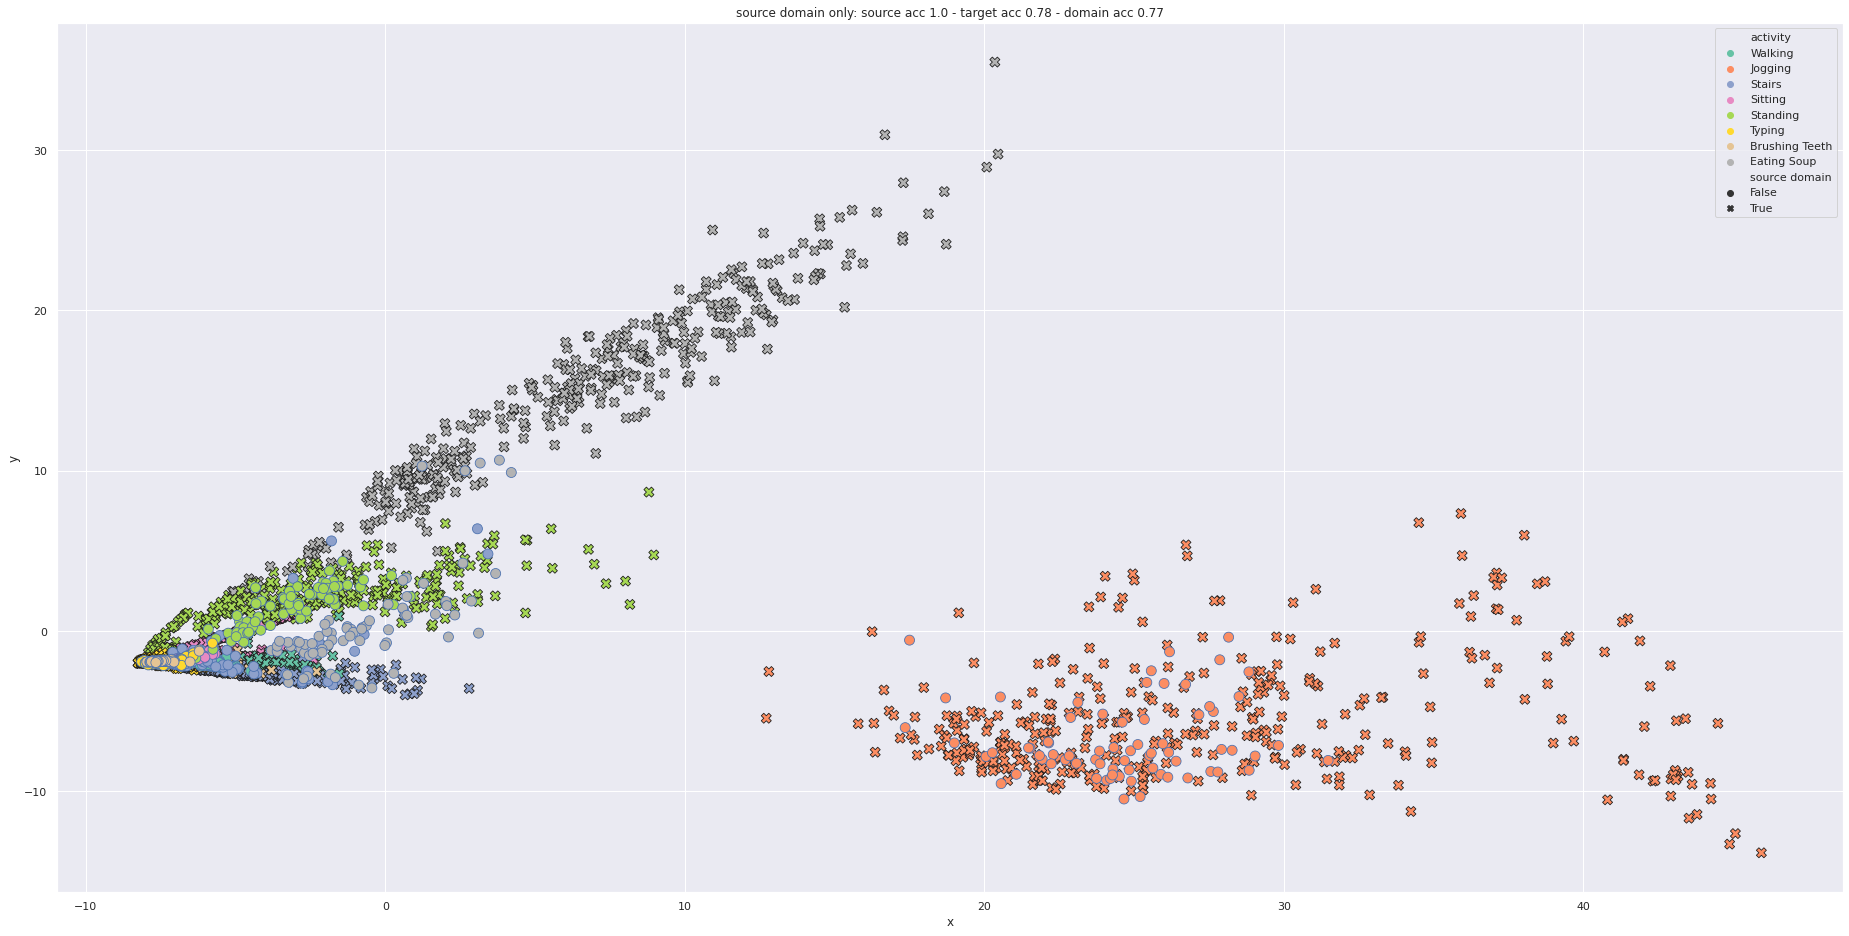

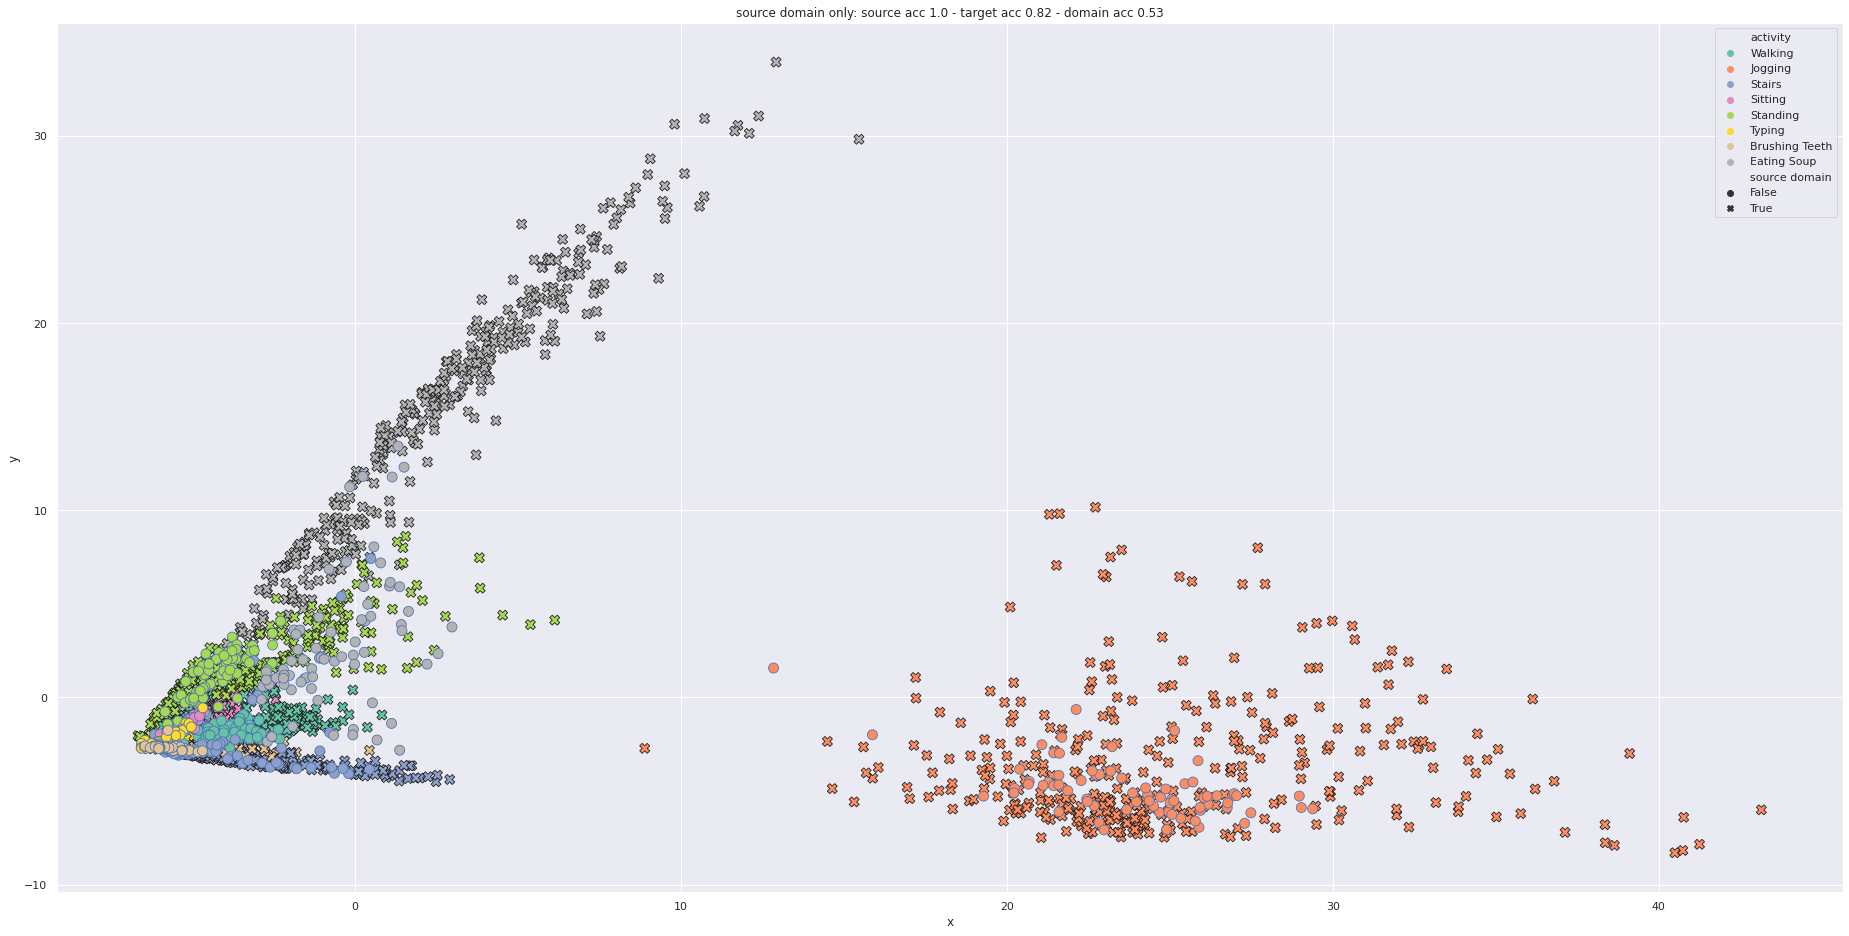

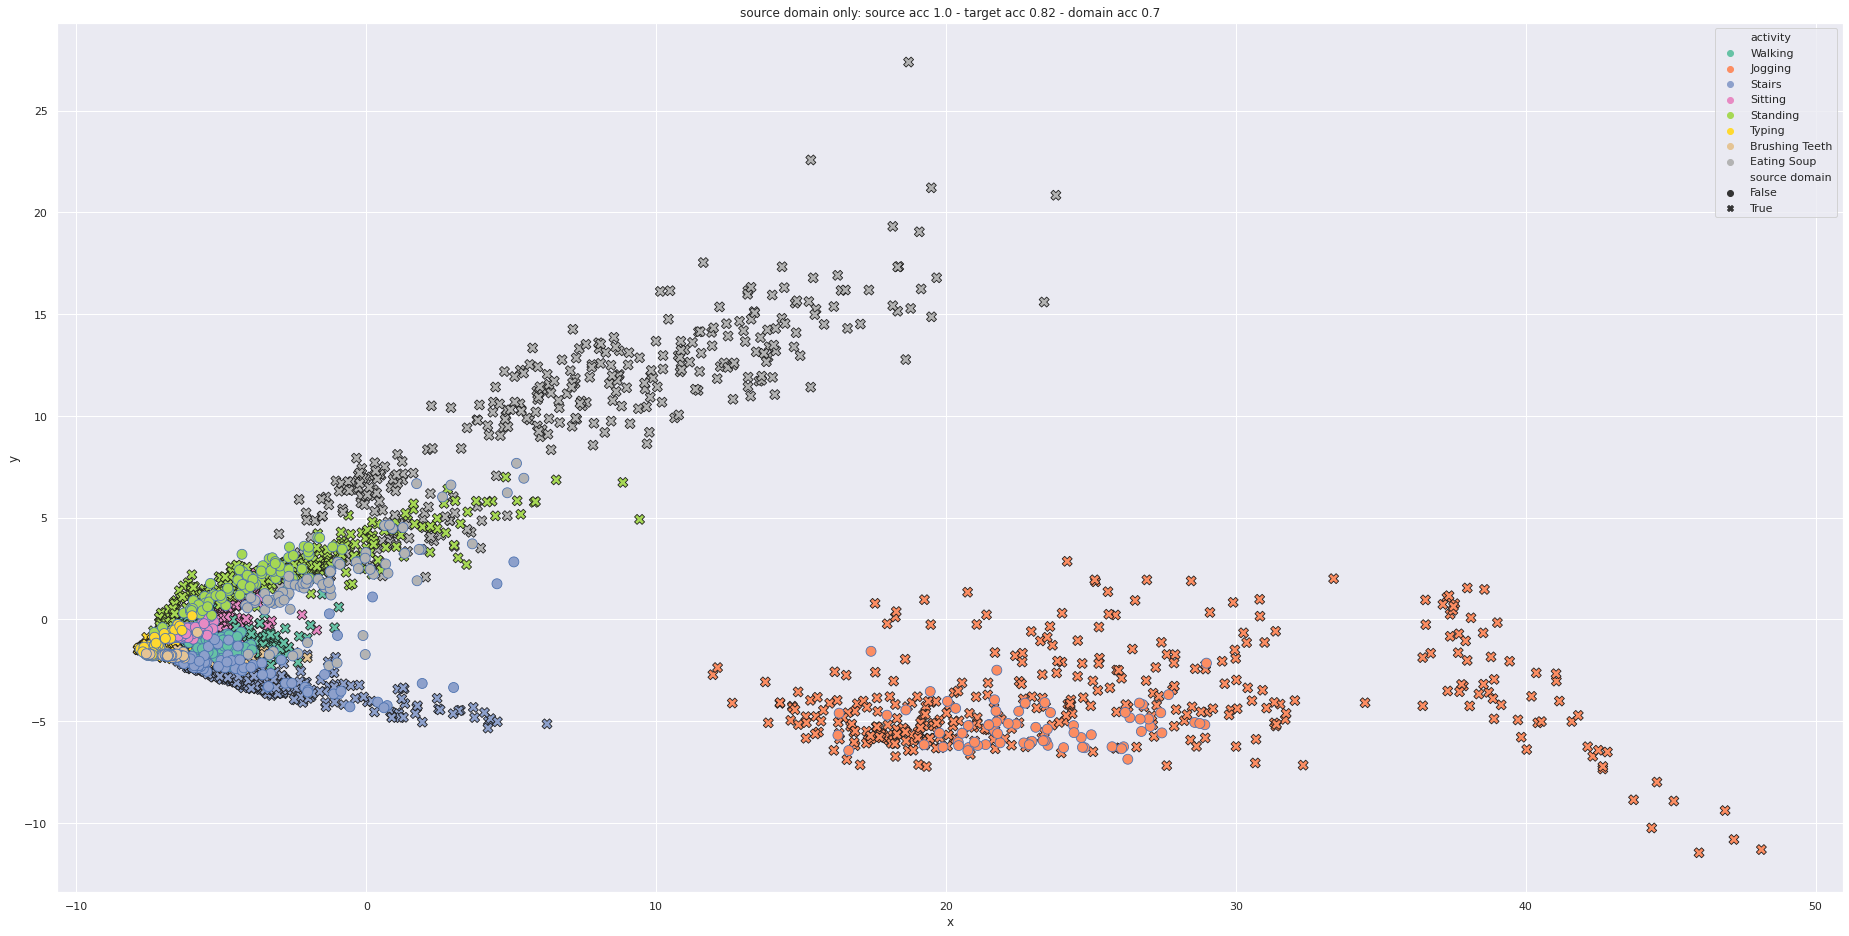

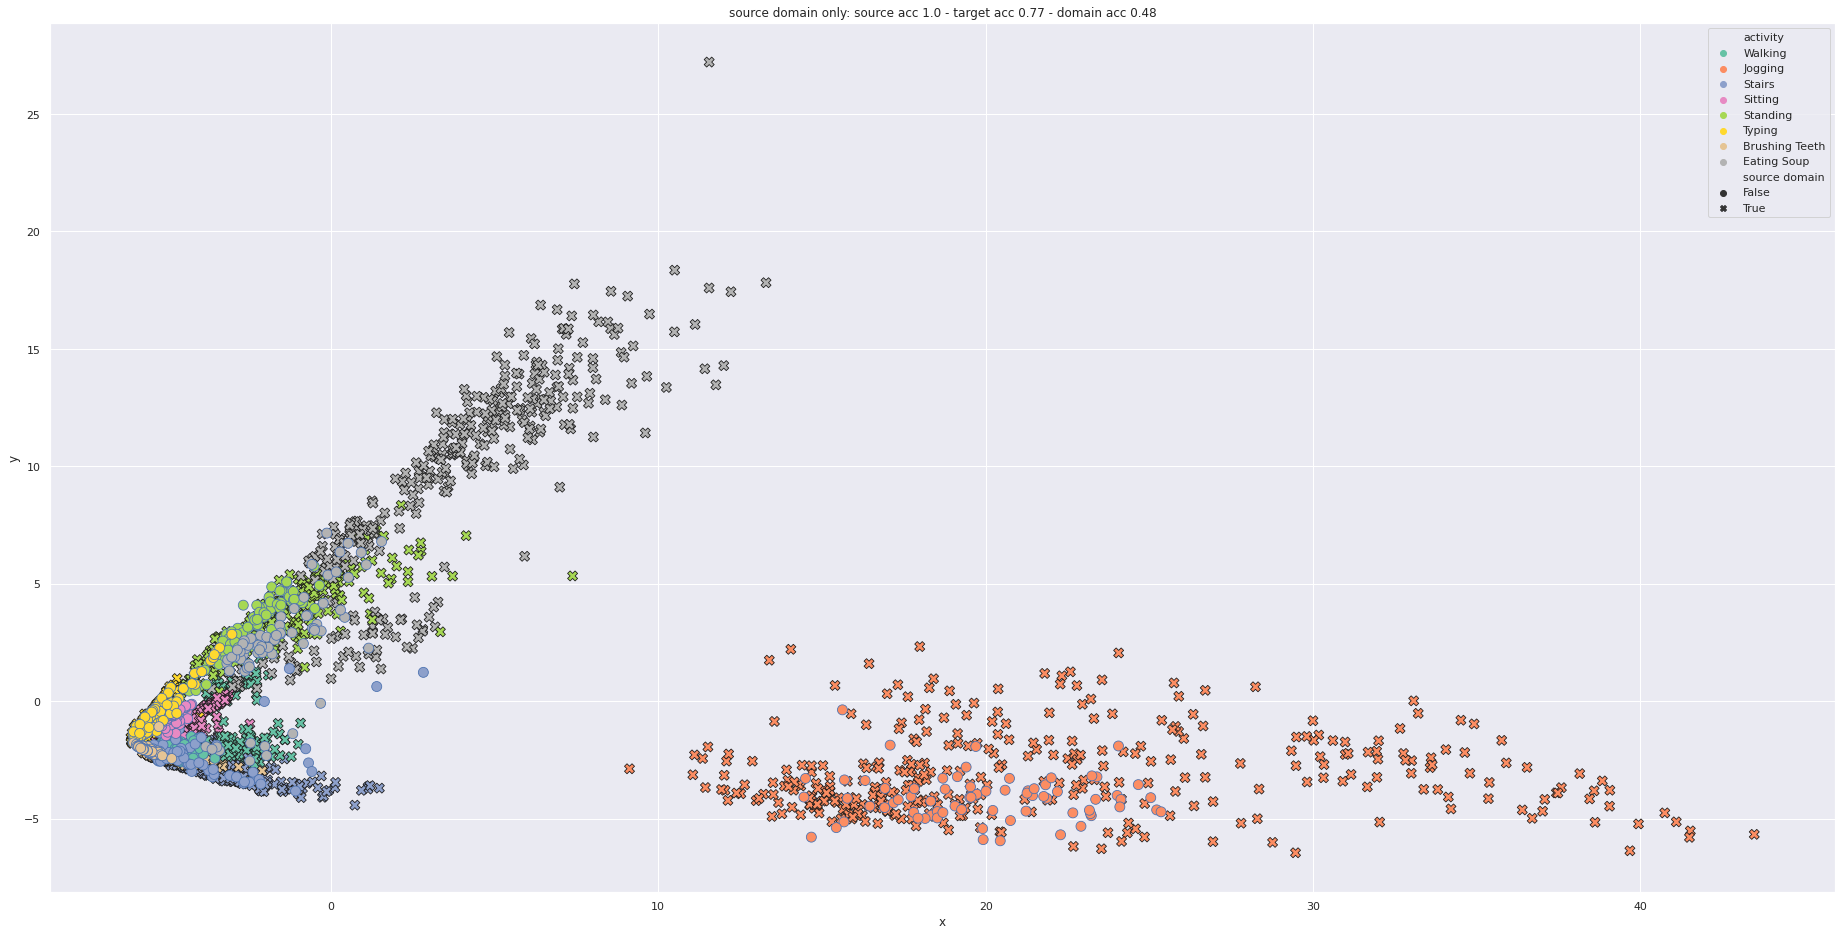

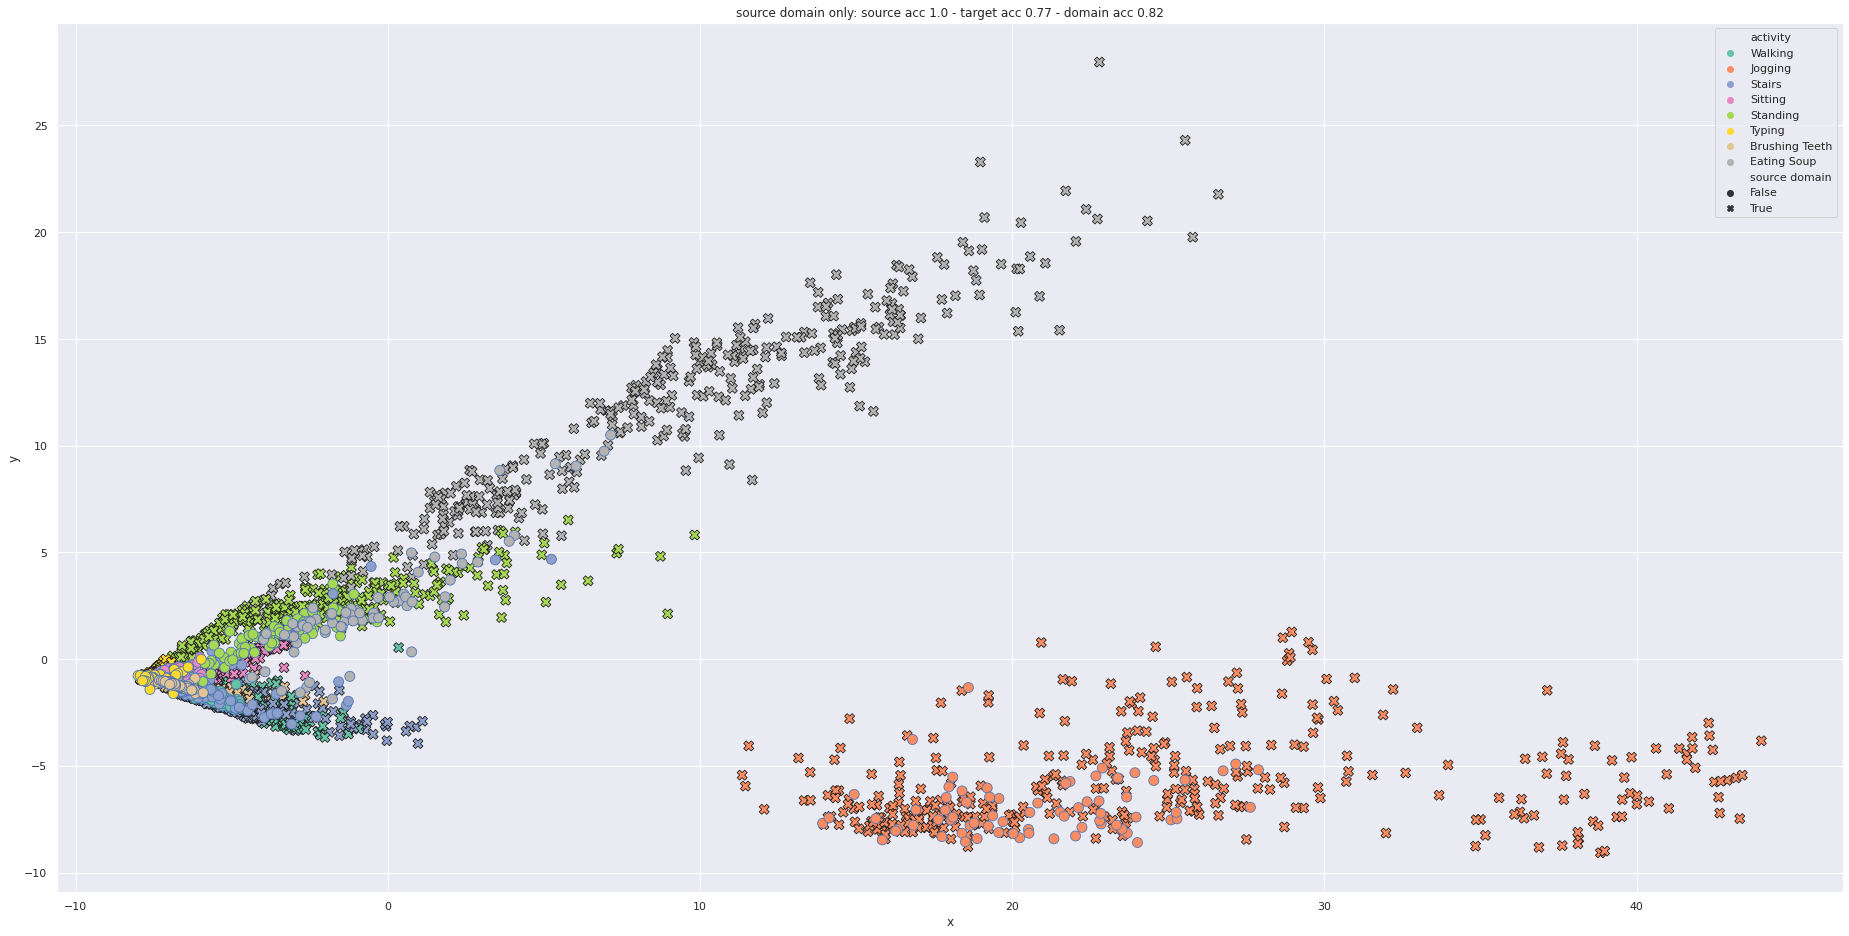

In [12]:
indomain_source_acc=[]
indomain_target_acc=[]
indomain_label_acc=[]

for c in range(cv):
  indomain_model=dann.DANN(alpha=alpha,
                           epochs=indomain_epoch,
                           batchsize=batchsize,
                           classifier_lr=clf_lr,
                           extractor_lr=ext_lr,
                           discriminator_lr=disc_lr)
  
  submodels=dann.submodel_config_march_15(num_class)
  indomain_model.set_submodels(submodels)

  indomain_model.source_domain_train(seen_x,seen_y)

  source_acc=indomain_model.evaluate_classifier_acc(seen_x,seen_y)
  target_acc=indomain_model.evaluate_classifier_acc(unseen_x,unseen_y)
  domain_acc=indomain_model.evaluate_domain_acc(seen_x,unseen_x)
  print("============================ cv {}/{} ==========================".format(c+1,cv))
  print(source_acc)
  print(target_acc)
  print(domain_acc)
  print("==============================================================")

  indomain_source_acc.append(source_acc)
  indomain_target_acc.append(target_acc)
  indomain_label_acc.append(domain_acc)

  dann.plot_pca_distributions(indomain_model.extractor,seen_x,seen_y,unseen_x,unseen_y,remapped_int_act_lookup)
  plt.title("source domain only: source acc {} - target acc {} - domain acc {}".format(np.round(source_acc,2),np.round(target_acc,2),np.round(domain_acc,2)))
  plt.legend(loc='upper right')

  plotname="indomain-{}_{}.jpg".format(c+1,cv)
  plotname=os.path.join(save_dir,plotname)

  plt.savefig(plotname,dpi=150,bbox_inches='tight')
  print(plotname)  

  summary['indomain source acc']=indomain_source_acc
  summary['indomain target acc']=indomain_target_acc
  summary['indomain domain acc']=indomain_label_acc

In [13]:
print("source domain acc: ",indomain_source_acc)
print("avg: ",np.mean(indomain_source_acc))
print()
print("target domain acc: ",indomain_target_acc)
print("avg: ",np.mean(indomain_target_acc))

source domain acc:  [1.0, 1.0, 1.0, 0.9996478873239436, 1.0]
avg:  0.9999295774647887

target domain acc:  [0.7799295774647887, 0.8169014084507042, 0.8204225352112676, 0.7746478873239436, 0.772887323943662]
avg:  0.7929577464788732


In [14]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S %m/%d")

summary['timestamp']=current_time

In [15]:
summary

{'act': {0: 'Walking',
  1: 'Jogging',
  2: 'Stairs',
  3: 'Sitting',
  4: 'Standing',
  5: 'Typing',
  6: 'Brushing Teeth',
  7: 'Eating Soup'},
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'crossdomain domain acc': [0.5715962441314554,
  0.5919405320813772,
  0.5044992175273866,
  0.6032863849765259,
  0.59839593114241],
 'crossdomain epoch': 90,
 'crossdomain source acc': [0.9894366197183099,
  0.8616197183098592,
  0.9975352112676056,
  0.9996478873239436,
  0.9834507042253521],
 'crossdomain target acc': [0.7975352112676056,
  0.6830985915492958,
  0.9278169014084507,
  0.9190140845070423,
  0.7852112676056338],
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain domain acc': [0.7683881064162754,
  0.528169014084507,
  0.6950312989045383,
  0.48219874804381846,
  0.8190532081377152],
 'indomain epoch': 20,
 'indomain source acc': [1.0, 1.0, 1.0, 0.9996478873239436, 1.0],
 'indomain target acc': [0.7799295774647887,
  0.8169014084507042,
  0.8204225352112676,
  0.77464788732

In [16]:
summary_savepath=os.path.join(save_dir,'summary.json')
with open (summary_savepath,'w') as jfile:
  json.dump(summary,jfile)